In [4]:
#Hana's 495 Final Project

#CHECK POINT 1 = DEEP NERUAL NETWORK OF CLASSIFICATION FOR KANJI FOR BASELINE PERFORMANCE

Import everything important

In [23]:
#import important things
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Import data set

['arr_0'] ['arr_0']
Xshape: (232365, 28, 28)
yshape: (232365,)
Classes: 49
[30 19 20 30  7  4 35 20 24 43]


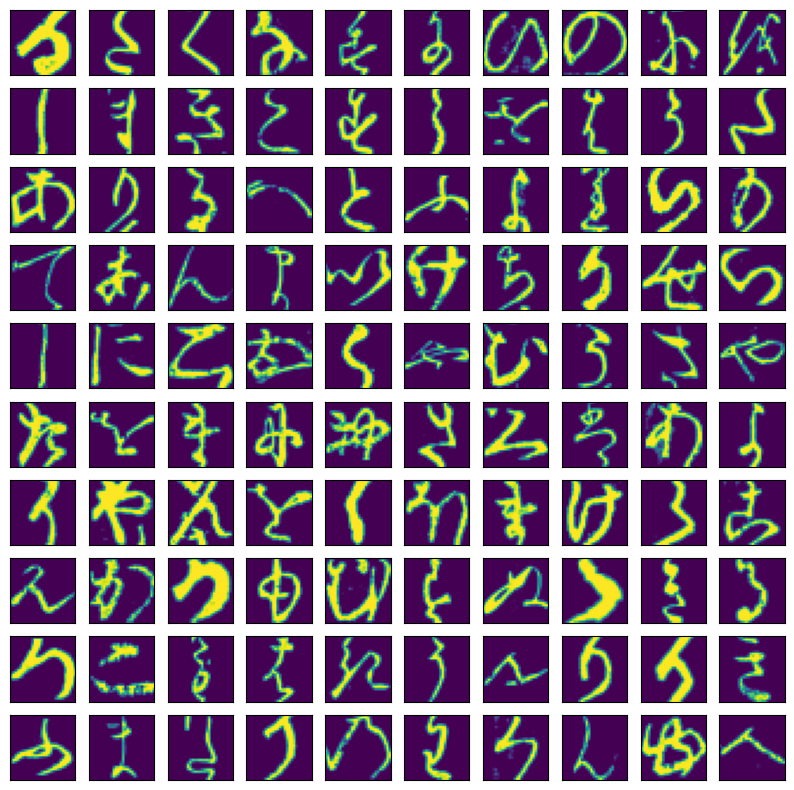

In [35]:

training_binary = np.load("C:/Users/C25Hana.Hill/495/495/Final_Project_495/k49-train-imgs.npz")

label_binary = np.load("C:/Users/C25Hana.Hill/495/495/Final_Project_495/k49-train-labels.npz")
print(training_binary.files, label_binary.files)




Xtrain = training_binary["arr_0"]
ytrain = label_binary["arr_0"]
print("Xshape:", Xtrain.shape)
print("yshape:", ytrain.shape)
num_class = len(np.unique(ytrain))
print("Classes:", num_class)
img_dim = Xtrain.shape[1]
print(ytrain[0:10])




def showRandom100Examples(X, y, imgdim=28):
    # Generate 100 random indices
    random_idx = np.random.randint(0, X.shape[0], 100)
    random_set = X[random_idx]
    random_set = random_set.reshape(10, 10, imgdim, imgdim)
    # Create 10x10 grid
    fig, ax = plt.subplots(10, 10, figsize=(10, 10))
    for i in range(random_set.shape[0]):
        for j in range(random_set.shape[1]):
            example = random_set[i, j]
            ax[i, j].imshow(example)
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
    plt.show()
            
showRandom100Examples(Xtrain, 0)


